In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset
df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
df_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df_train.shape

(8523, 12)

In [7]:
df_test.shape

(5681, 11)

In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
#joining the traininh and testing dataset together 
df_train['source']='train'
df_test['source']='test'
df=pd.concat([df_train,df_test],ignore_index=True)

In [13]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [14]:
#checking for null values 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [15]:
df.shape

(14204, 13)

In [16]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


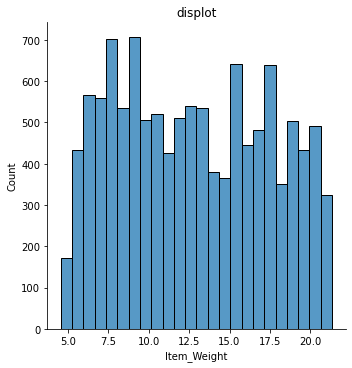

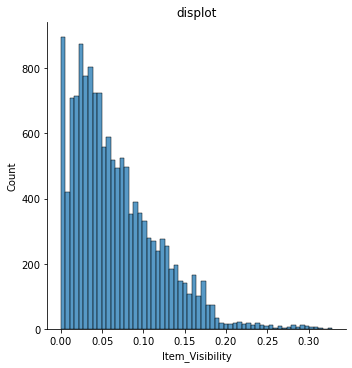

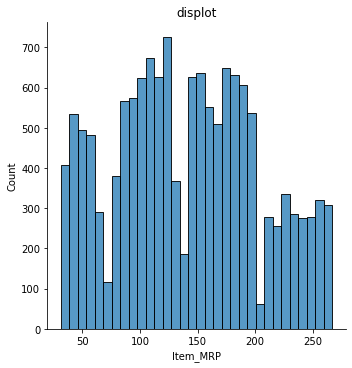

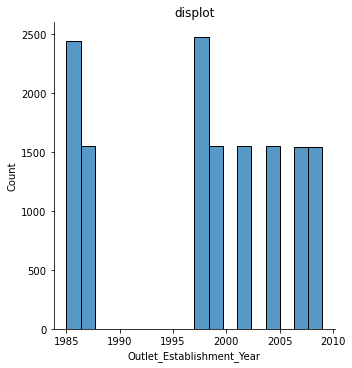

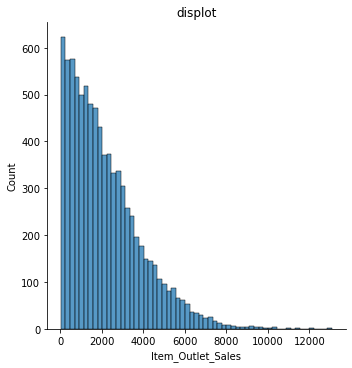

In [19]:
#creating a distplot for describe
for i in df.describe().columns:
    sns.displot(df[i].dropna())
    plt.title("displot")
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

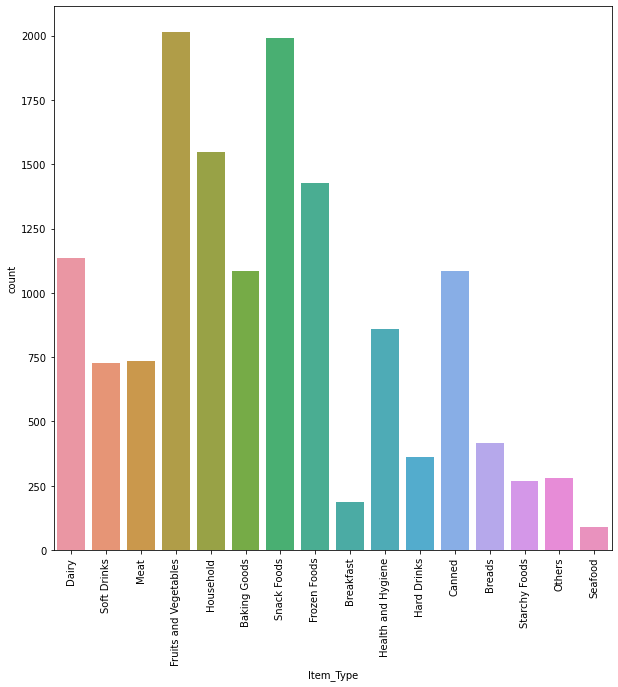

In [20]:
#making a count plot 
plt.figure(figsize=[10,10])
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)

In [21]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

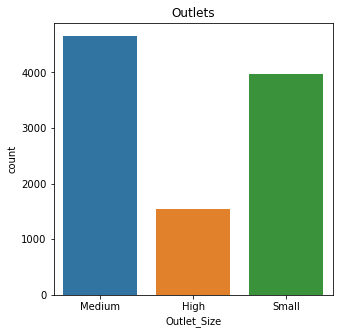

In [22]:
plt.figure(figsize=[5,5])
sns.countplot(df.Outlet_Size)
plt.title("Outlets")
plt.show()

In [23]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

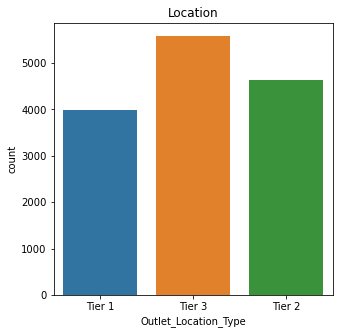

In [24]:
plt.figure(figsize=[5,5])
sns.countplot(df.Outlet_Location_Type)
plt.title("Location")
plt.show()

In [25]:
df.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

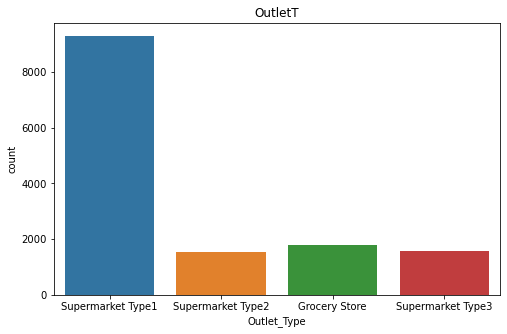

In [26]:
plt.figure(figsize=[8,5])
sns.countplot(df.Outlet_Type)
plt.title("OutletT")
plt.show()

In [27]:
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

<AxesSubplot:title={'center':'Anslysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

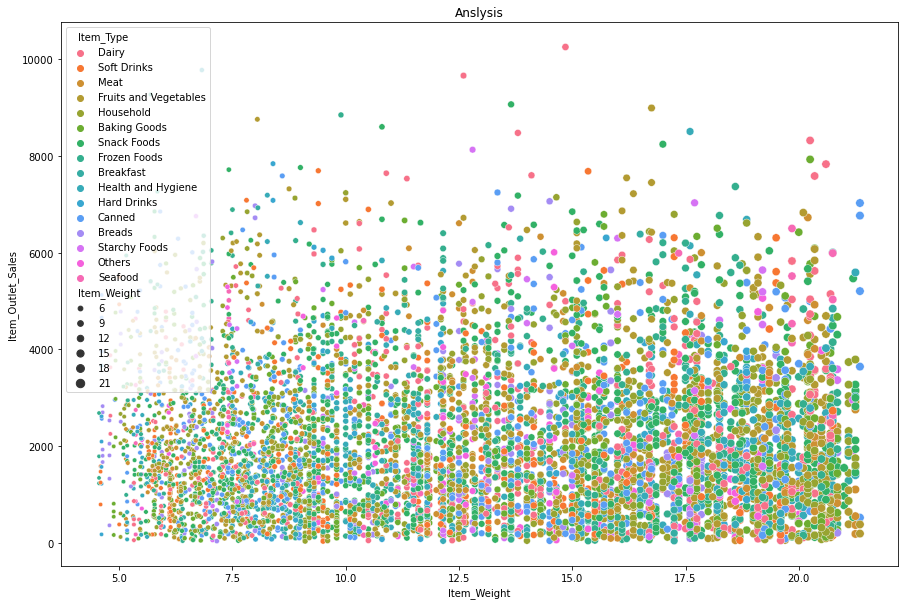

In [28]:
plt.figure(figsize=(15,10))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Anslysis")
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df)

<AxesSubplot:title={'center':'Anslysis'}, xlabel='Item_Visibilty', ylabel='Item_Outlet_Sales'>

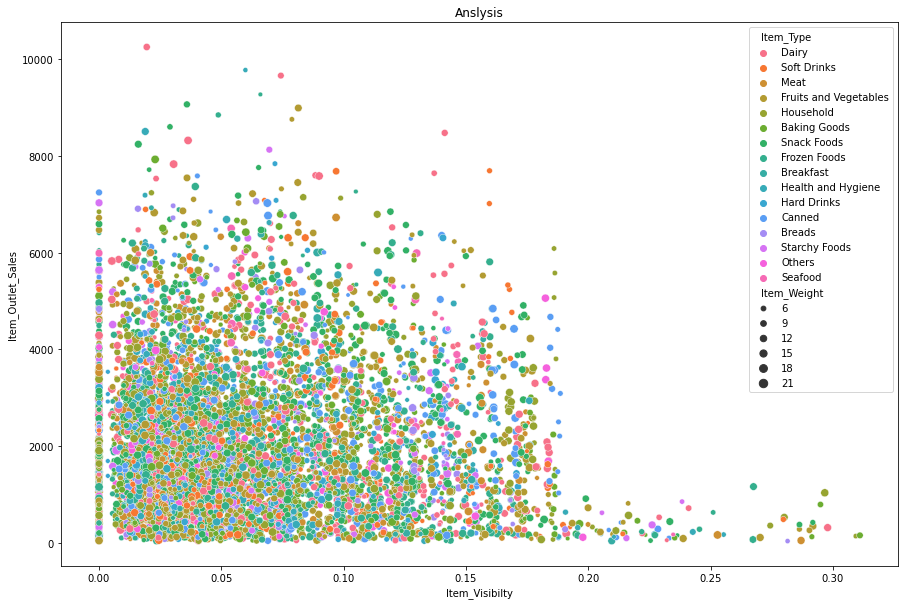

In [29]:
plt.figure(figsize=(15,10))
plt.xlabel("Item_Visibilty")
plt.ylabel("Item_Outlet_Sales")
plt.title("Anslysis")
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df)

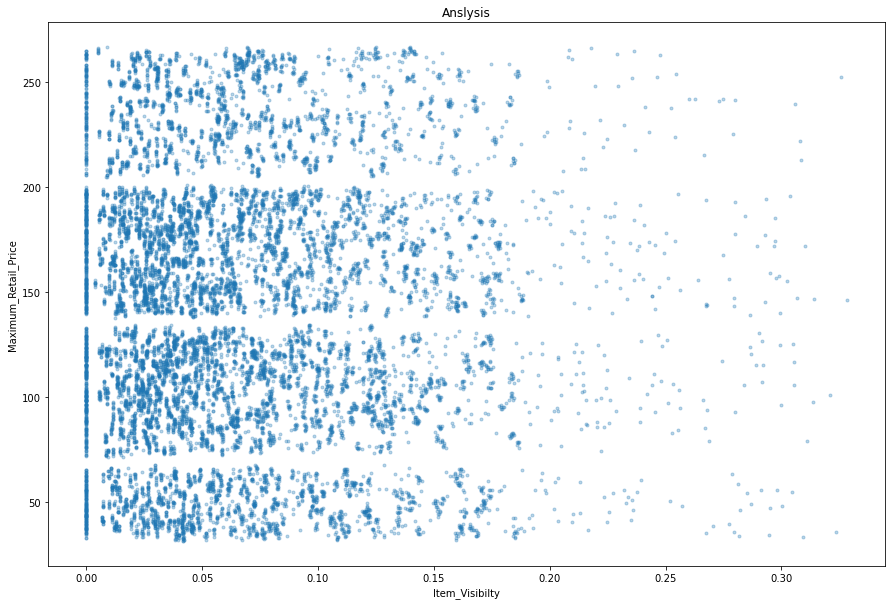

In [30]:
plt.figure(figsize=(15,10))
plt.xlabel("Item_Visibilty")
plt.ylabel("Maximum_Retail_Price")
plt.title("Anslysis")
plt.plot(df.Item_Visibility,df.Item_MRP,".",alpha=0.3)

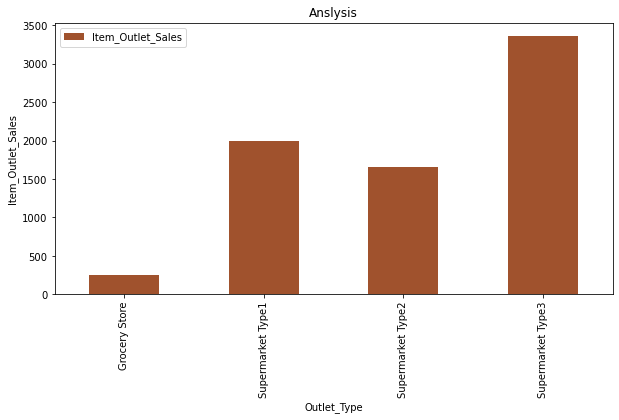

In [31]:
Outlet_Type_pivot=\
df.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar',color='sienna',figsize=(10,5))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Anslysis")
plt.show()

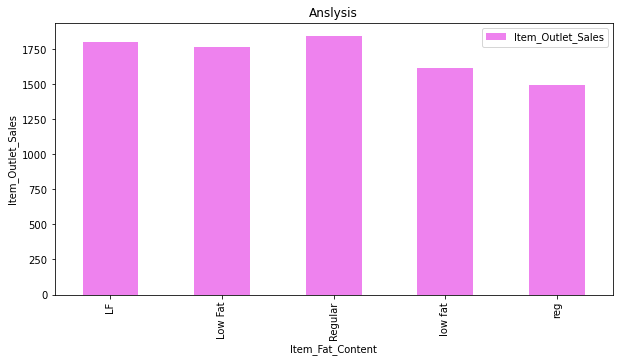

In [32]:
Item_Fat_Content_pivot=\
df.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='violet',figsize=(10,5))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Anslysis")
plt.show()

In [33]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [34]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [35]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [36]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

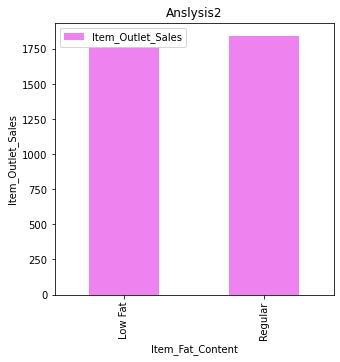

In [37]:
Item_Fat_Content_pivot=\
df.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='violet',figsize=(5,5))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Anslysis2")
plt.show()

In [38]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


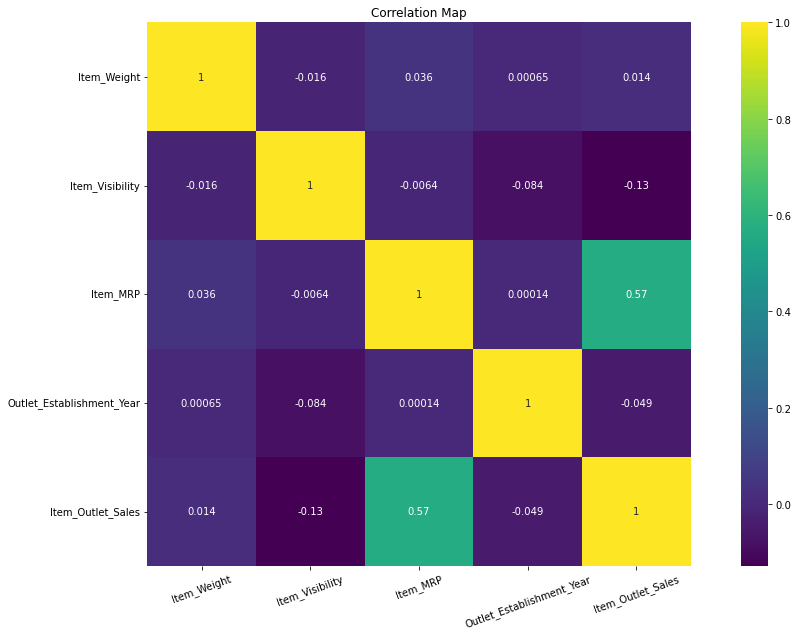

In [39]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Correlation Map")
plt.xticks(rotation=20)
plt.show()

In [40]:
#feature engineering
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [41]:
#replacing the Nan values 
df['Item_Weight'].mean()

12.792854228644991

In [42]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [43]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [44]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [45]:
df['Item_Outlet_Sales'].mean()

2181.2889135750365

In [46]:
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean(),inplace=True)

In [47]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

As we can see, we no longer have null values

In [48]:
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [49]:
#after this, we're going to start model engineering 
df['New_Item_Type']=df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [50]:
df.loc[df['New_Item_Type']=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [51]:
item_visib_avg=df.pivot_table(values='Item_Visibility',index='Item_Identifier')
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [52]:
function=lambda x:x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index==x['Item_Identifier']][0]
df['item_visib_avg']=df.apply(function,axis=1).astype(float)

In [53]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000,train,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800,train,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000,train,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.380000,train,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,train,Non-Consumable,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2181.288914,test,Food,0.874729
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2181.288914,test,Food,0.878292
14201,NCO17,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,2181.288914,test,Non-Consumable,1.162245
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,2181.288914,test,Food,0.000000


In [54]:
#using label encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df['Outlet']=LE.fit_transform(df['Outlet_Identifier'])
varib=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type','Outlet']
for i in  varib:
    df[i]=LE.fit_transform(df[i])

In [55]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.138000,train,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.422800,train,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.270000,train,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.380000,train,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.705200,train,2,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,2,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,1,2181.288914,test,1,0.874729,8
14200,FDD47,7.60,2,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,2,2181.288914,test,1,0.878292,3
14201,NCO17,10.00,1,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,1,2181.288914,test,2,1.162245,7
14202,FDJ26,15.30,2,0.000000,Canned,214.6218,OUT017,2007,1,1,1,2181.288914,test,1,0.000000,2


In [56]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type','Outlet'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
O

In [57]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [58]:
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

In [59]:
train.drop(['source'],axis=1,inplace=True)

In [60]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [61]:
x_train=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train=train['Item_Outlet_Sales']
x_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [63]:
pred_test=lr.predict(x_test)
pred_test

array([1843., 1519., 1866., ..., 1831., 3527., 1295.])

In [64]:
pred_train=lr.predict(x_train)
pred_train

array([4059.,  577., 2371., ..., 1515., 1409., 1235.])

In [65]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

56

In [66]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
tree_pred

array([1649.67954808, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [67]:
tree_accuracy=round(tree.score(x_train,y_train)*100)
tree_accuracy

62

In [68]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(x_train,y_train)
rf.pred=rf.predict(x_test)

In [69]:
rf_accuracy=round(rf.score(x_train,y_train)*100)
rf_accuracy

61

In [70]:
!pip install xgboost

In [71]:
import xgboost
from xgboost import XGBRegressor

model=XGBRegressor(n_estimators=100,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [72]:
y_pred=model.predict(x_test)
y_pred

array([1677.5859, 1297.0201,  663.4421, ..., 1859.8622, 3726.8762,
       1258.1014], dtype=float32)

In [73]:
model.score(x_train,y_train)*100

67.67289168496187

The best model is xgboost with a result of 67.7